In [1]:
import tensorflow as tf
import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

2024-01-24 11:50:48.147743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Define paths to your training and testing directories
train_dir = 'Datasets/RAF-DB/DATASET/train'
test_dir = 'Datasets/RAF-DB/DATASET/test'
# train_dir = 'Datasets/FER2013/train'
# test_dir = 'Datasets/FER2013/test'
# Set the image size and batch size
image_size = (224, 224)
#image_size = (48, 48)

batch_size = 32

# Create an ImageDataGenerator for data augmentation (optional)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # Normalize pixel values
    horizontal_flip=True,  # Augmentation: horizontal flip
    # zoom_range=0.0,  # Augmentation: zoom (with current dataset not needed, since faces are centered)
    # rotation_range=10,  # Augmentation: rotation
    # width_shift_range=0.05,  # Augmentation: width shift (only 5% since faces are centered)
    # height_shift_range=0.05  # Augmentation: height shift (only 5% since faces are centered)
)

test_datagen = ImageDataGenerator(rescale=1. / 255)  # Only rescaling for test data

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,  # Resize images to (48, 48) for uniformity
    batch_size=batch_size,  # Batch size for training
    #color_mode='grayscale',  # FER-2013 images are grayscale
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    #color_mode='grayscale',
    class_mode='categorical'
)

Found 12271 images belonging to 7 classes.
Found 3068 images belonging to 7 classes.


train_generator and test_generator are now ready to be used in model training and evaluation

In [10]:
# Define the model
model = Sequential()

# First Conv Block
model.add(Conv2D(224, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second Conv Block
model.add(Conv2D(112, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third Conv Block
model.add(Conv2D(56, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # Assuming 7 emotions

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 224)     6272      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 224)     0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 111, 111, 224)     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 112)     225904    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 112)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 54, 54, 112)      

In [11]:
# Number of epochs to train for
epochs = 10

# Steps per epoch (usually the number of samples in the training set divided by the batch size)
steps_per_epoch = train_generator.samples // train_generator.batch_size

# Validation steps (usually the number of samples in the validation set divided by the batch size)
validation_steps = test_generator.samples // test_generator.batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=validation_steps
)

Epoch 1/10
383/383 [==============================] - 1661s 4s/step - loss: 1.5977 - accuracy: 0.4227 - val_loss: 1.2918 - val_accuracy: 0.5375
Epoch 2/10
383/383 [==============================] - 1574s 4s/step - loss: 1.2864 - accuracy: 0.5332 - val_loss: 1.1216 - val_accuracy: 0.6089
Epoch 3/10
383/383 [==============================] - 1645s 4s/step - loss: 1.2056 - accuracy: 0.5668 - val_loss: 1.0653 - val_accuracy: 0.6434
Epoch 4/10
383/383 [==============================] - 1691s 4s/step - loss: 1.1383 - accuracy: 0.5860 - val_loss: 1.0020 - val_accuracy: 0.6618
Epoch 5/10
383/383 [==============================] - 1859s 5s/step - loss: 1.1073 - accuracy: 0.6073 - val_loss: 0.9886 - val_accuracy: 0.6562
Epoch 6/10
383/383 [==============================] - 2144s 6s/step - loss: 1.0689 - accuracy: 0.6156 - val_loss: 0.9538 - val_accuracy: 0.6707
Epoch 7/10
383/383 [==============================] - 2161s 6s/step - loss: 1.0412 - accuracy: 0.6277 - val_loss: 0.9210 - val_accuracy:

96/96 [==============================] - 113s 1s/step - loss: 0.8526 - accuracy: 0.6988
Test accuracy:  0.6988266110420227
96/96 [==============================] - 112s 1s/step
Classification Report
              precision    recall  f1-score   support

           1       0.10      0.10      0.10       329
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       160
           4       0.39      0.44      0.41      1185
           5       0.14      0.09      0.11       478
           6       0.04      0.04      0.04       162
           7       0.22      0.29      0.25       680

    accuracy                           0.26      3068
   macro avg       0.13      0.14      0.13      3068
weighted avg       0.23      0.26      0.25      3068


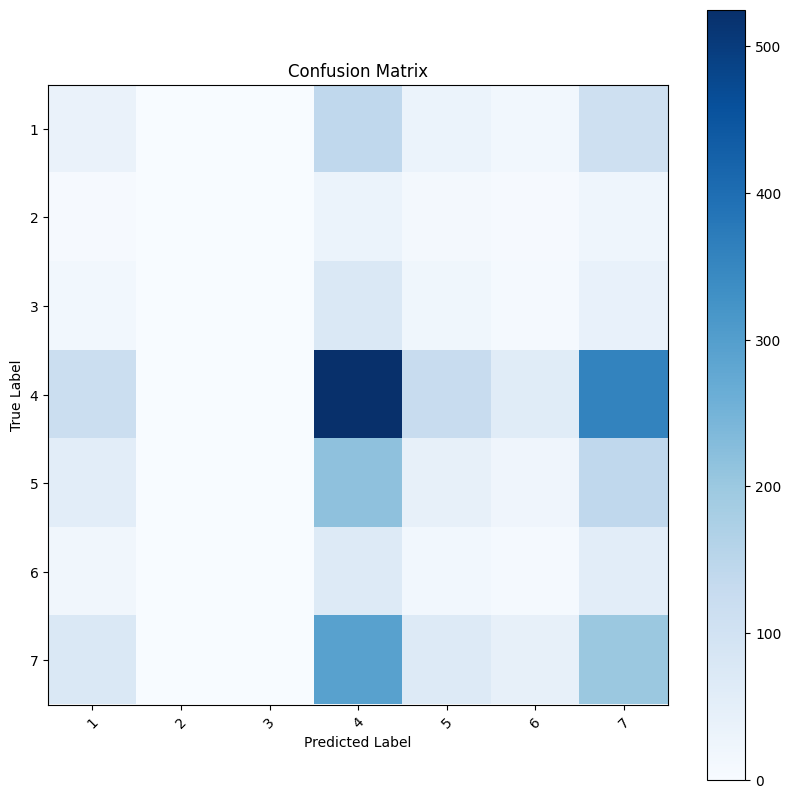

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))
print("Test accuracy: ", test_accuracy)

# Predictions on the test set
test_generator.reset()
predictions = model.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))
predicted_classes = np.argmax(predictions, axis=1)

# Since the generator omits some samples due to rounding down in 'steps', we trim 'true_classes' to match 'predicted_classes' length
true_classes = test_generator.classes
true_classes = true_classes[:len(predicted_classes)]

class_labels = list(test_generator.class_indices.keys())

# Classification report
print("Classification Report")
print(classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Conducting error analysis
This can be done by examining misclassified examples, which can provide insights into what types of errors the model is making